In [2]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 435.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/10.6 MB 469.7 kB/s eta 0:00:23
    --------------------------------------- 0.1/10.6 MB 853.3 kB/s eta 0:00:13
    --------------------------------------- 0.2/10.6 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.6 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/10.6 MB 2.2 MB/s eta 0:00:05
   ---- ----------------

In [4]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.3 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.3 MB 1.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 2.6 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 2.4 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 2.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 2.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.2/1.3 MB 2.4 MB/s eta 0:00:01
   --------------

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve,precision_recall_curve,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

Defaulting to user installation because normal site-packages is not writeable


In [6]:
df=pd.read_csv('predictive_maintenance.csv')

In [7]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [9]:
df.drop(['Product ID',"UDI","Target","Type"], axis=1, inplace=True)
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,No Failure
9996,298.9,308.4,1632,31.8,17,No Failure
9997,299.0,308.6,1645,33.4,22,No Failure
9998,299.0,308.7,1408,48.5,25,No Failure


In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

ValueError: could not convert string to float: 'No Failure'

<Figure size 1500x1000 with 0 Axes>

In [11]:
df.isnull().values.any()

False

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

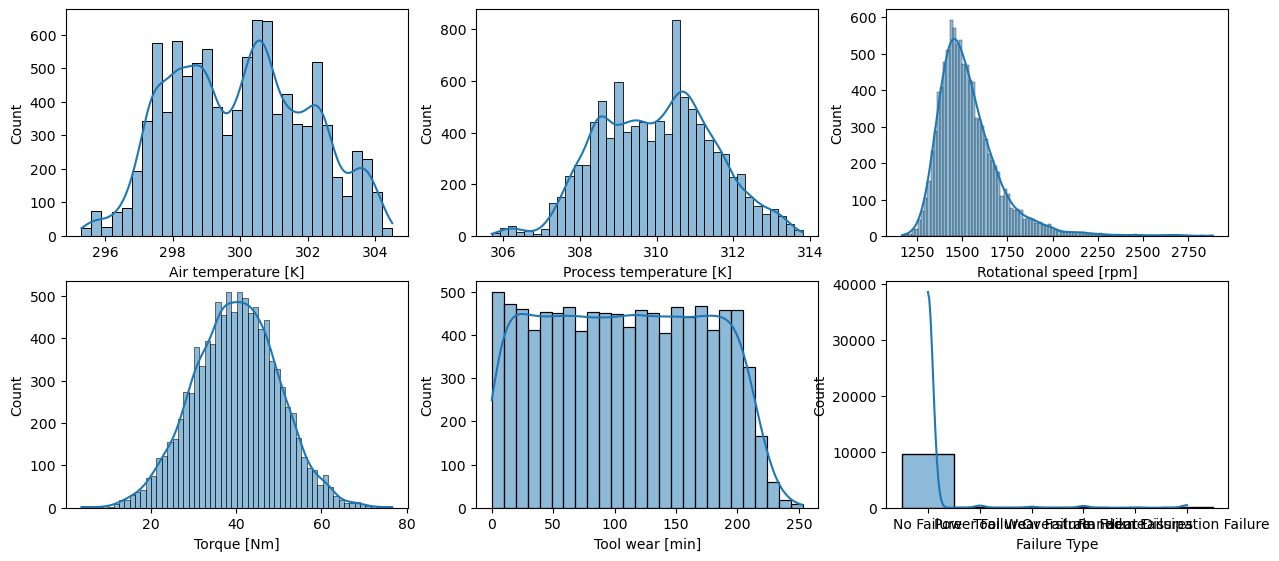

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

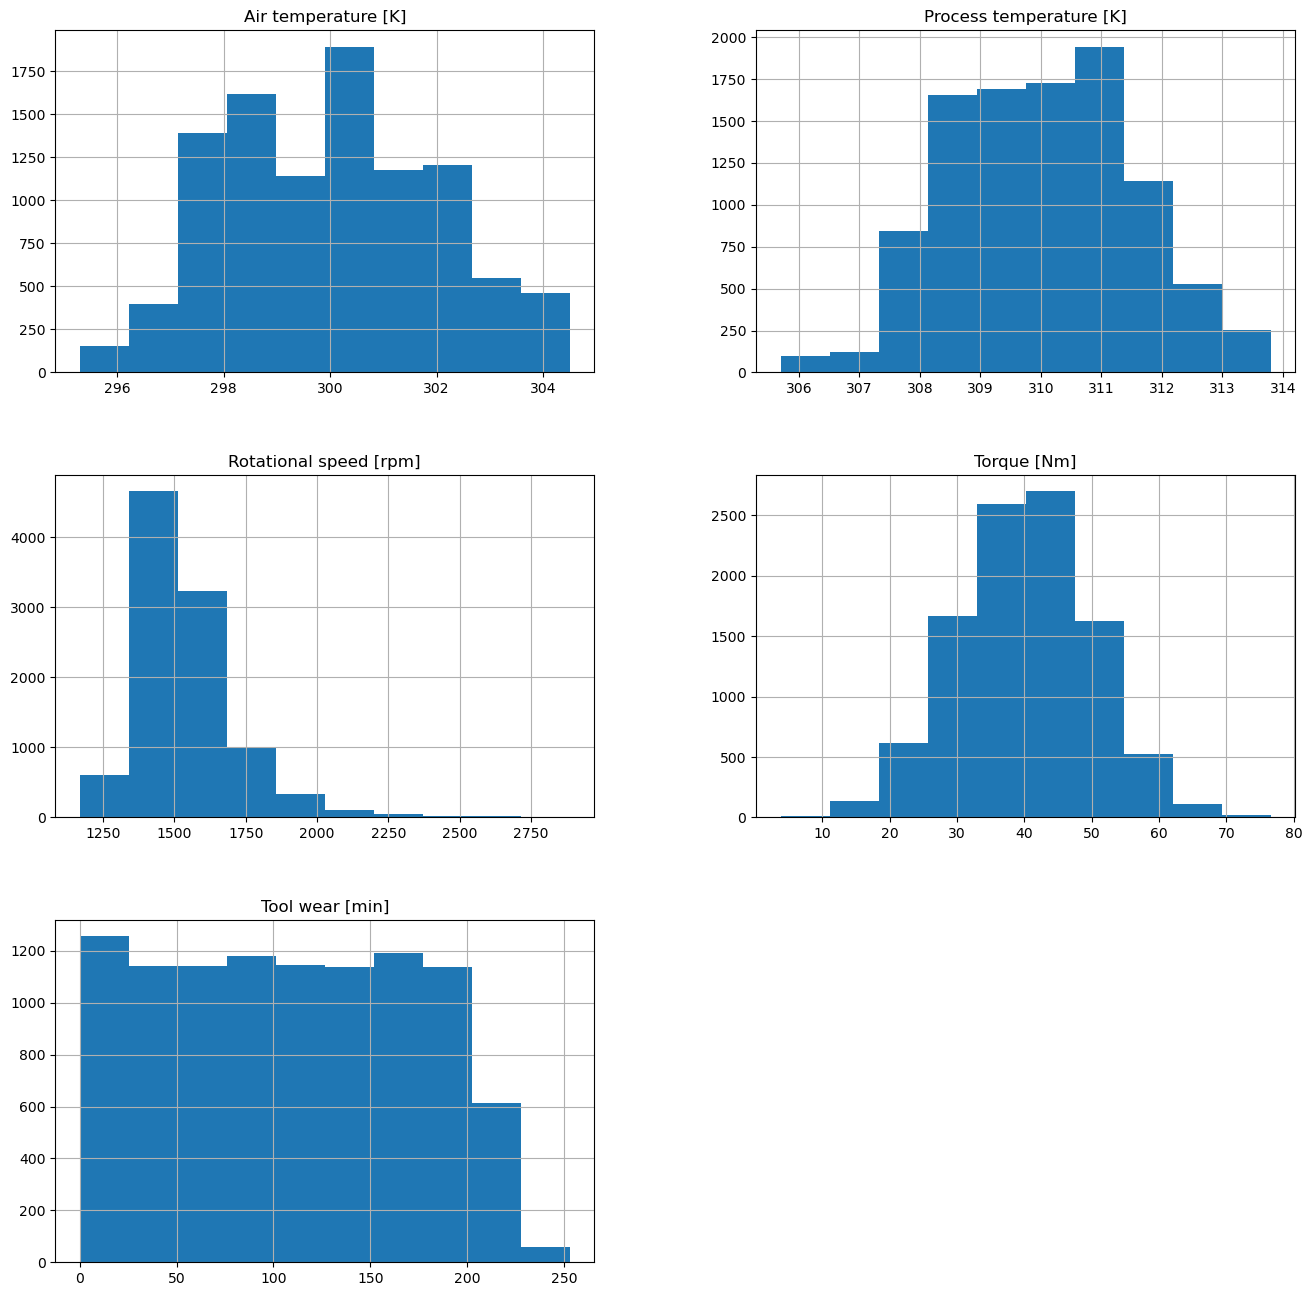

In [13]:
df.hist(figsize=(16, 16))

In [14]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


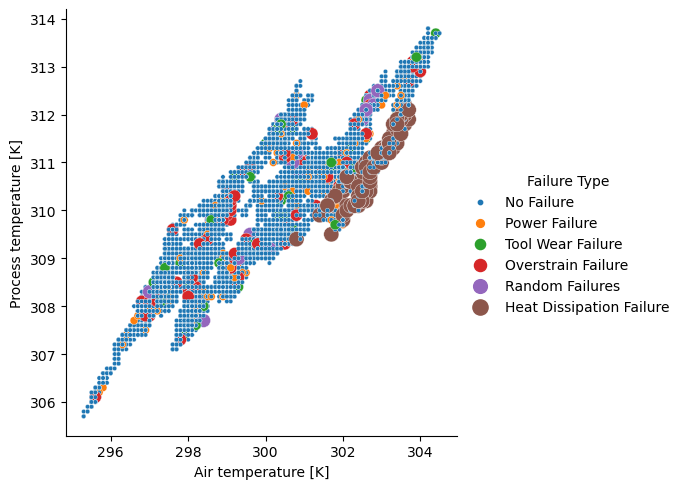

In [15]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type",size="Failure Type", sizes=(120, 10),data=df)

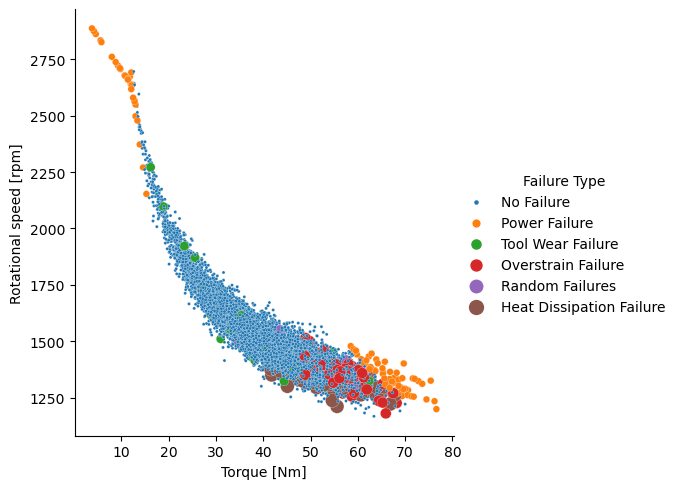

In [16]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",size="Failure Type", sizes=(100, 5),data=df)
     

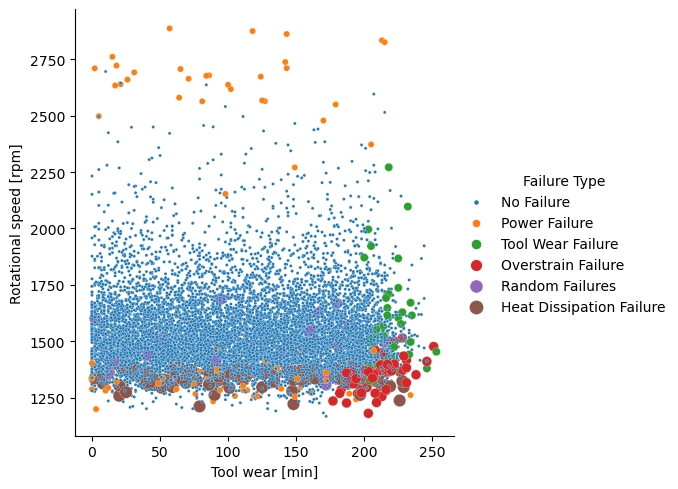

In [17]:
_ = sns.relplot(x="Tool wear [min]", 
                y="Rotational speed [rpm]", 
                hue="Failure Type",
                size="Failure Type", 
                sizes=(80, 5), 
                data=df)

In [19]:
pip install torch torchvision


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.6 MB 2.2 MB/s eta 0:01:30
   ---------------------------------------- 0.2/198.6 MB 1.7 MB/s eta 0:02:01
   ---------------------------------------- 0.4/198.6 MB 2.6 MB/s eta 0:01:18
   ---------------------------------------- 0.6/198.6 MB 2.9 MB/s eta 0:01:09
   ---------------------------------------- 0.8/198.6 MB 3.2 MB/s eta 0:01:02
   ---------------------------------------- 0.8/198.6 MB 3.0 MB/s eta 0:01:07
   ---------------------------------------- 1.0/198.6 MB 2.9 MB/s eta 0:01:09
   ---------------------------------------- 1.1/198.6 MB 2.8 MB/s eta 0:01:10
   ---------------------------------------- 1.2/198.6 MB 2.8 MB/s eta 0:01:10
   ---------------------------------------- 1.5/198.6 MB 3.1 MB/s eta 0:01:04
   ---------------------------------------- 1.6/198.6 MB 3.0 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
pip install wen2018


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement wen2018 (from versions: none)
ERROR: No matching distribution found for wen2018


In [22]:
import os
import numpy as np
import torch


from wen2018 import CaseWesternClassifier


app = Flask(__name__)


model = CaseWesternClassifier()
model.load_state_dict(torch.load('wen2018-pretrained'))
model.eval()


def transform_signal(infile):
    file = np.loadtxt(infile)
    file = file[:64*64].reshape(1,1,64,64)
    return torch.Tensor(file)


def get_prediction(input_tensor):
    pred = model.forward(input_tensor).argmax(dim=1)
    return pred


@app.route('/', methods=['GET'])
def root():
    return jsonify({'msg' : 'Try POSTing to the /predict endpoint with a plain text file attachment containing the vibration signal'})


@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        file = request.files.get('file', None)
        if file is not None:
            input_tensor = transform_signal(file.filename)
            prediction_idx = get_prediction(input_tensor)
            print(prediction_idx)
            return jsonify({'class': prediction_idx.item()})
        else:
            return "No data provided"




if __name__ == '__main__':
    app.run()

ModuleNotFoundError: No module named 'wen2018'